# Workflow stages

In [1]:
# Workflow stages:
# 1. Question
# 2. Wrangle
# 3. Explore
# 4. Draw conclusions

You will not be required to use statistics or machine learning to complete this project, but you should make it clear in your communications that your findings are tentative. This project is open-ended in that we are not looking for one right answer.

Q：What factors made people more likely to survive?

Try and suggest questions that promote looking at relationships between multiple variables. You should aim to analyze at least one dependent variable and three independent variables in your investigation. Make sure you use NumPy and Pandas where they are appropriate!

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Acqure data

In [3]:
filename = '~/self-learning/dataanalytics/project2/titanic-data.csv'
titanic_df = pd.read_csv(filename)

# Describing data

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
print(titanic_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Categorical features:**

Categorical: Survived, Sex, Embarked. Ordinal: Pclass.

**Numerical features:**

Continuous: Age, Fare. Discrete: SibSp, Parch.

In [6]:
# preview
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Age, Cabin, Embarked*** features contain a number of null values.

# 1. Qustion
What factors made people more likely to survive?

# 2. Wrangle

## 2.1 Droping useless featues

In [9]:
titanic_df.shape

(891, 12)

In [10]:
# drop unnecessary columns that are useless during the analysis.
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
titanic_df.shape

(891, 8)

## 2.2 Dropping outliers

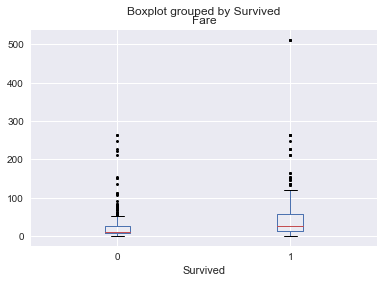

In [12]:
titanic_df.boxplot(column = 'Fare', by = 'Survived', sym='k.')

Source: [Stackoverflow](http://stackoverflow.com/questions/28908003/matplotlib-box-plot-fliers-not-showing)

The above is the distribution of the fare divided by survival (0 or 1). Form this boxplot, we can easily see that most of the fare is under 100, and there is a very large above 500. This could be an outlier. 

So I will drop it in the following steps.

In [13]:
# drop the maximum values which are above 500
titanic_df.ix[titanic_df.Fare == titanic_df['Fare'].max(), 'Fare'] = np.NaN

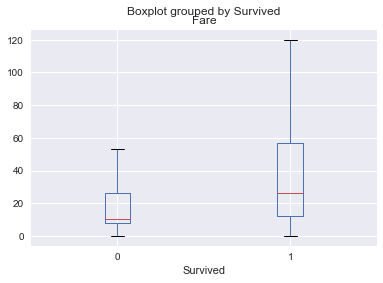

In [14]:
# After dropping the outlier
titanic_df.boxplot(column = 'Fare', by = 'Survived', sym='k.', showfliers=False)

The above boxplot shows the distribution of the fare. We can see passengers who didn't survive have lower fare, which is more concentrated. By contrast, passengers who survive have higher fare, which is much wider. Its third quartile is nearly 120! 

## 2.3 Group Age, Fare by bands

In [15]:
titanic_df['AgeBand'] = pd.cut(titanic_df['Age'], np.arange(0,90,10))
titanic_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0, 10]",0.593750
1,"(10, 20]",0.382609
2,"(20, 30]",0.365217
3,"(30, 40]",0.445161
4,"(40, 50]",0.383721
5,"(50, 60]",0.404762
6,"(60, 70]",0.235294
7,"(70, 80]",0.200000


In [16]:
titanic_df['FareBand'] = pd.cut(titanic_df['Fare'], np.arange(0,350,50))
titanic_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(0, 50]",0.324022
1,"(50, 100]",0.654206
2,"(100, 150]",0.791667
3,"(150, 200]",0.666667
4,"(200, 250]",0.636364
5,"(250, 300]",0.666667


# 3. Explore

### 3.1 Univariate Analysis

In [17]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,888.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,30.582164
std,0.486592,0.836071,14.526497,1.102743,0.806057,41.176366
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,30.771850
max,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


Conclusion: 177 people's age are missing.

In [18]:
titanic_df.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


Conclusion: 2 people's Embarked feature are missing.

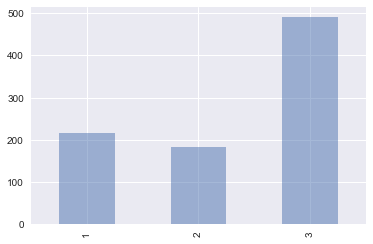

In [19]:
# visualizing Pclass
titanic_df['Pclass'].value_counts(sort=False).plot(kind='bar',alpha=.5)

The plot above shows the distribution of the number of Pclass.

1. We can see more than half of the passengers are in 3-level Pclass.
2. The number of Passengers in 1-level and 2-level Pclass have no big difference.

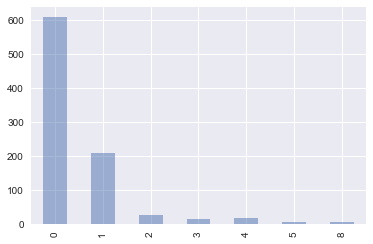

In [20]:
# visualizing SibSp
titanic_df['SibSp'].value_counts(sort=False).plot(kind='bar',alpha=.5)

The plot above shows the distribution of the number of SibSp. 

1. From the plot above, we can conclude that most passengers have no or only one SibSp (Siblings/Spouses). 
2. Only few of tham have more than 2 SibSp.

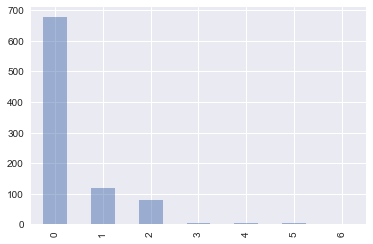

In [21]:
# visualizing Parch
titanic_df['Parch'].value_counts(sort=False).plot(kind='bar',alpha=.5)

The plot above shows the distribution of the number of Parch. 

1. From the plot above, we can conclude that most passengers have less than or equal to three Parch (Parents/Children). 
2. Only few of tham have more than 4 Parch.

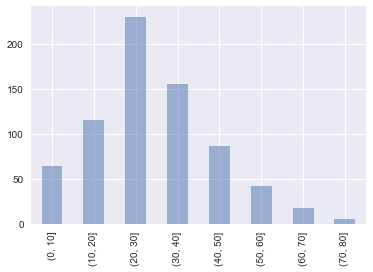

In [22]:
# visualizing AgeBand
titanic_df['AgeBand'].value_counts(sort=False).plot(kind='bar',alpha=.5)

The plot above shows the distribution of passengers in different age bands.

1. Most passengers' age are in 10-50 range.
2. More than 200 of passengers are in 20-30 range, which is the maximum numbers.
3. The number of the oldest people are relatively small.

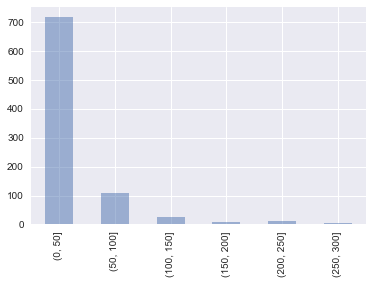

In [23]:
# visualizing FareBand
titanic_df['FareBand'].value_counts(sort=False).plot(kind='bar',alpha=.5)

The plot above shows the distribution of fare bands.

1. The vast majority of passengers buy the fare below 50.
2. vary small number of passengers buy high fare (>150).

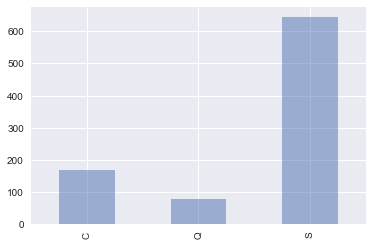

In [24]:
# visualizng Embarked
titanic_df['Embarked'].value_counts(sort=False).plot(kind='bar',alpha=.5)

The plot above shows the embarked place of passengers.

1. The vast majority of passengers are from S port (>600).

### 3.2 Multivariate Analysis

### 3.2.1 Computing correlations

In [25]:
# define correlation function
def correlation(x, y):
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y - y.mean())/y.std(ddof=0)
    return (std_x * std_y).mean()

survived = titanic_df['Survived']
pclass = titanic_df['Pclass']
age = titanic_df['Age']
sibsp = titanic_df['SibSp']
parch = titanic_df['Parch']
fare = titanic_df['Fare']

In [26]:
# Computing Correlations
print correlation(survived, pclass)
print correlation(survived, age)
print correlation(survived, sibsp)
print correlation(survived, parch)
print correlation(survived, fare)

-0.338481035961
-0.0779826784139
-0.0353224988857
0.0816294070835
0.261471518461


### 3.2.2 Bivariate Analysis

In [27]:
def bivariate(feature):
    print titanic_df.groupby([feature, 'Survived'])['Survived'].count().unstack()
    titanic_df.groupby([feature, 'Survived'])['Survived'].count().unstack().plot(kind='bar', stacked='true')

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


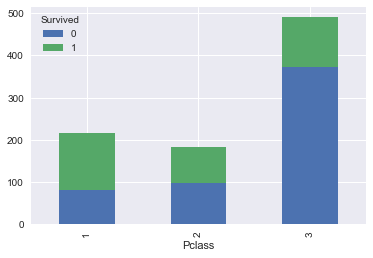

In [28]:
bivariate('Pclass')

The plot above shows the survival situations (in numbers) of different Pclass.

1. We can see more than half of the passengers are in 3-level Pclass.
2. Passengers in 3-level Pclass have less chance to survive than Pclass 1 and 2.

Survived      0      1
SibSp                 
0         398.0  210.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN


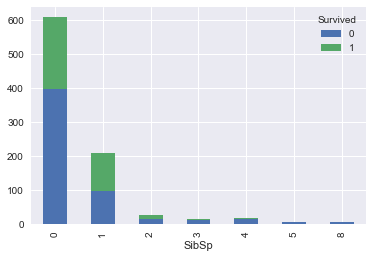

In [29]:
bivariate('SibSp')

The plot above shows the survival situations (in numbers) of passengers with diffferent SibSp. 

1. Most passengers have no or only one SibSp (Siblings/Spouses).
2. Passengers who have no SibSp have less chance to survive than passengers who have 1 SibSp. 

Survived      0      1
Parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN


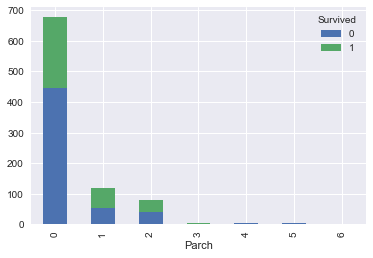

In [30]:
bivariate('Parch')

The plot above shows the survival situations (in numbers) of passengers with diffferent Parch. 

1. Most passengers (nearly 700) have no Parch.
2. A few of passengers (nearly 200) obly have 1 or 2 Parch.
3. Passengers with no Parch have less chance to survive than passengers with 1 or 2 Parch.

Survived    0   1
AgeBand          
(0, 10]    26  38
(10, 20]   71  44
(20, 30]  146  84
(30, 40]   86  69
(40, 50]   53  33
(50, 60]   25  17
(60, 70]   13   4
(70, 80]    4   1


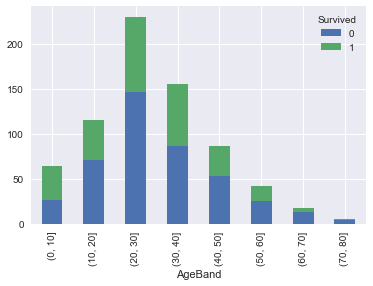

In [31]:
bivariate('AgeBand')

The plot above shows the survival rate of passengers in different age bands. 

1. Passengers in 20-30 age band have lower survival rate.
2. It's easy to see that children (<=10) and middle-aged people (30-60) have higher survival rate.

Survived      0    1
FareBand            
(0, 50]     484  232
(50, 100]    37   70
(100, 150]    5   19
(150, 200]    3    6
(200, 250]    4    7
(250, 300]    2    4


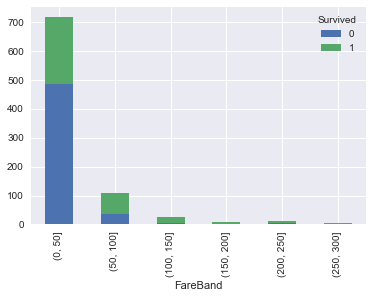

In [32]:
bivariate('FareBand')

The plot above shows the survival rate of passengers in different fare bands. 

1. Passengers who buy lower fare (0-50) have lower survival rate thon others.
2. Passengers who buy high fare (>100) have extremely high survival rate. Nearly all of them survive.

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


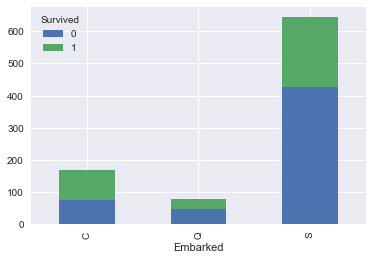

In [33]:
bivariate('Embarked')

The plot above shows the survival rate of passengers embarked from 3 different places. 

1. The vast majority of passengers are from S port (>600).
2. Passegers from C port have more than half of possibility to survive, which is the highest. 
3. The other two places have no very big difference considering the survival rate. 

### 3.2.3 Trivariate Analysis

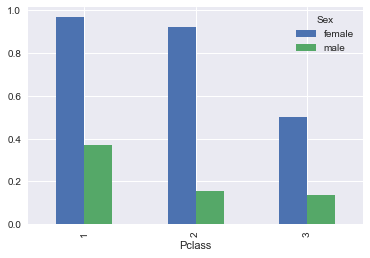

In [34]:
titanic_df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack().plot(kind='bar')

The plot above shows the survival rate of two genders in diffferent Pclass. 
1. We can easily to see that females in 1 or 2 level Pclass have very hight survival rate (>90%). 
2. Femals in 3 Pclass still have higher survival rate than all males--nearly above 50%.
3. Males are less likely to survive but males in higher-level Pclass do have more chance to survive than males in lower-level Pclass. 

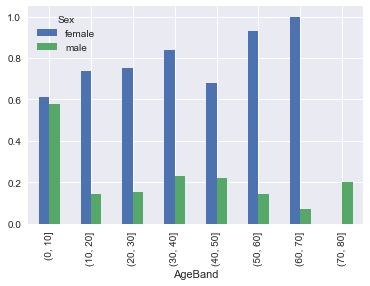

In [35]:
titanic_df.groupby(['AgeBand', 'Sex'])['Survived'].mean().unstack().plot(kind='bar')

The plot above shows the survival rate of two genders in diffferent age bands. 
1. It's obvious to see infants and chidren's survival rate have no big difference.
2. Generally speaking, females with higher age have higher survival rate, though we notice it's no the case in age band (40, 50].
3. Males in (0,10], (30, 50] and (70, 80] age bands are more likely to survive than other age bands. They stand for children, middle-aged and the odlest, respectively.

# 4. Conclusion

### Final conclusion
We conclude that passengers with ***female gender, high-level Pclass, younger (infants) or older (>30), embarked from C, have 1 or 2 SibSp/Parch*** have relatively higher survival rate. 

Off course, the conclusion is tentative and limited, based on the following facts.

All our conclusions are tentative, based on the following facts:

1. The data set doesn't have every passenger's data on board. Accurately speaking, we only have 819 out of 2224 passengers' information, which is not big enough to represent the whole population.

2. Additionally, within 819 passengers, there're still some missing values. Some features like Age, Embarked are empty or null. And the way I deal with the missing values do bring some biases into the data set. For instance, I complete the Embarked feature with the most common place, which may not be the real case.

3. Finally, the dataset itself is limited. As we know, the survival rate can be influenced by many other factors. For example, the passenger's weight and height, whether he/she can swim, etc. 

All of these facts contribute to my analysis's limitation and so the conclusion is tentative.